In [168]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [169]:
dataset = pd.read_csv("./data/Iris.csv", index_col='Id')

In [170]:
dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [171]:
names = [ i for i in dataset.columns if type(dataset[i].iloc[0]) in [np.int64, np.float64] ]
len(names)

4

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X_scaled = scaler.fit_transform(X)

In [173]:
filtered_dataset = dataset[names]
filtered_dataset = StandardScaler().fit_transform(filtered_dataset)
PCA_features=  PCA(n_components=0.95).fit_transform(filtered_dataset)

In [174]:
clustering_dataset = pd.DataFrame(PCA_features, columns=[ f'PCA {i}' for i in range(1, len(PCA_features[0]) + 1)])

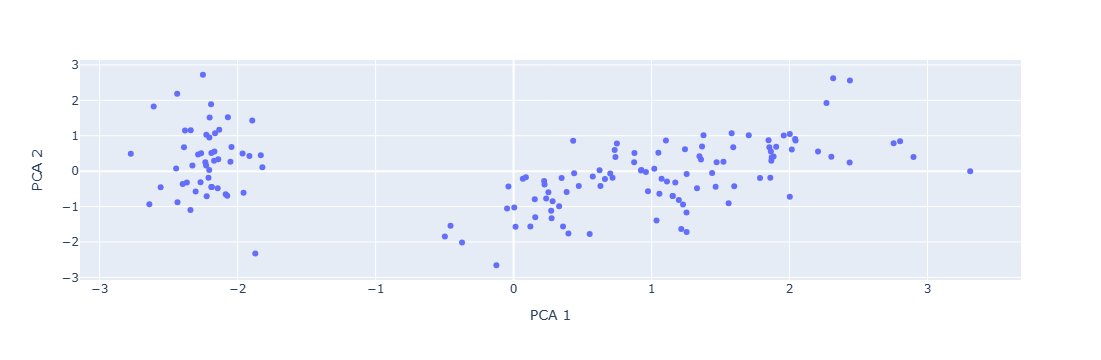

In [175]:
px.scatter(clustering_dataset, x='PCA 1', y='PCA 2')

D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

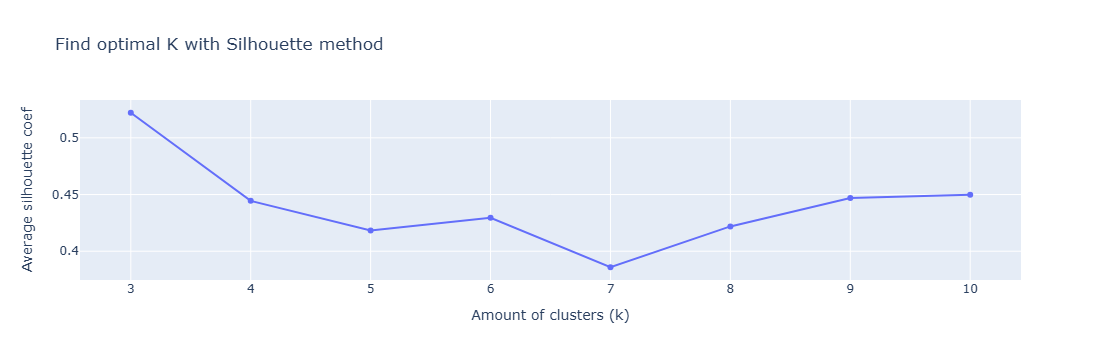

In [176]:
silhouette_avg_scores = []
k_range = range(3,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clustering_dataset)
    score = silhouette_score(clustering_dataset, labels)
    silhouette_avg_scores.append(score)

# Build silhouette coef graph 
fig_score = px.line(
    x=list(k_range),
    y=silhouette_avg_scores,
    markers=True,
    labels={'x': 'Amount of clusters (k)', 'y': 'Average silhouette coef'},
    title='Find optimal K with Silhouette method '
)
fig_score.show()

In [177]:
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.328


D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



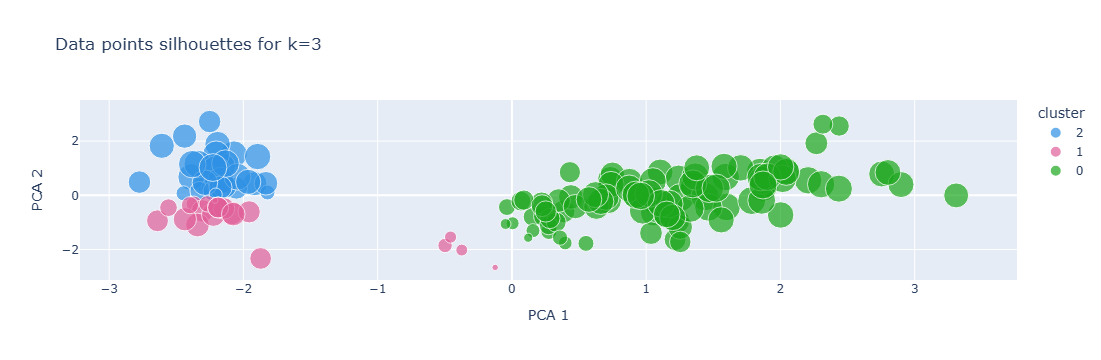

In [178]:
optimal_k = k_range[np.argmax(silhouette_avg_scores)]
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_opt.fit_predict(clustering_dataset)
sample_silhouette_values = silhouette_samples(clustering_dataset, cluster_labels)

clustering_dataset["cluster"] = cluster_labels.astype(str)
clustering_dataset["silhouette"] = sample_silhouette_values
scaler = MinMaxScaler()
clustering_dataset["silhouette"] = scaler.fit_transform(sample_silhouette_values.reshape(-1, 1)).flatten()
fig_points = px.scatter(
    clustering_dataset,
    x="PCA 1",
    y="PCA 2",
    color="cluster",
    size="silhouette",
    color_discrete_sequence=px.colors.qualitative.Dark24,
    title=f"Data points silhouettes for k={optimal_k}"
)
fig_points.show()


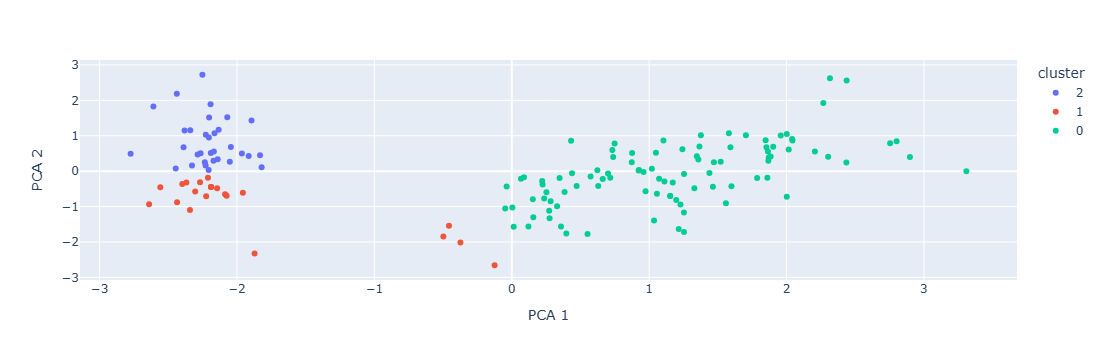

In [179]:
px.scatter(clustering_dataset, x="PCA 1", y="PCA 2", color='cluster')

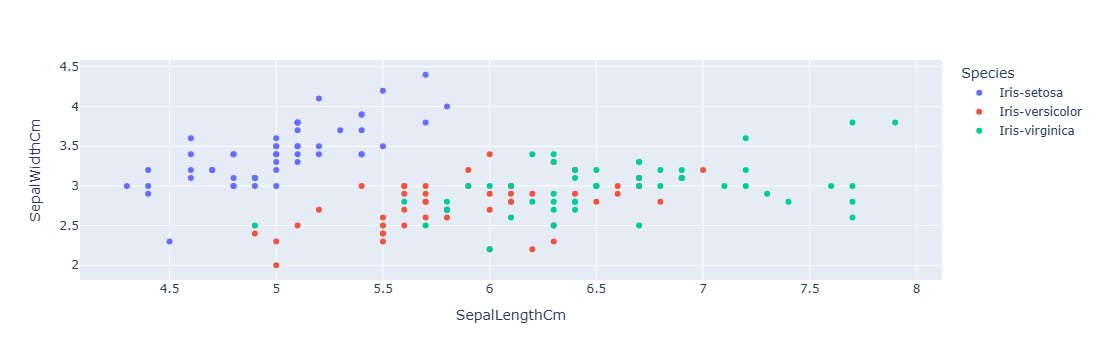

In [181]:
px.scatter(dataset, x='SepalLengthCm', y='SepalWidthCm', color='Species')

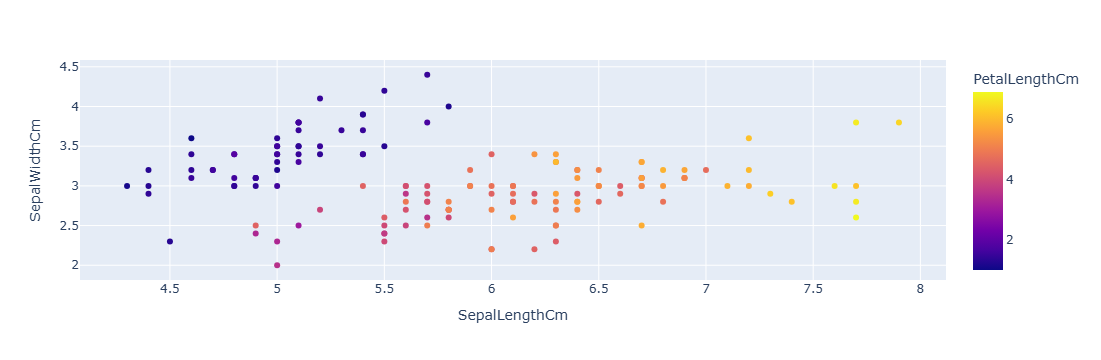

In [182]:
px.scatter(dataset, x='SepalLengthCm', y='SepalWidthCm', color='PetalLengthCm')

D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\program\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

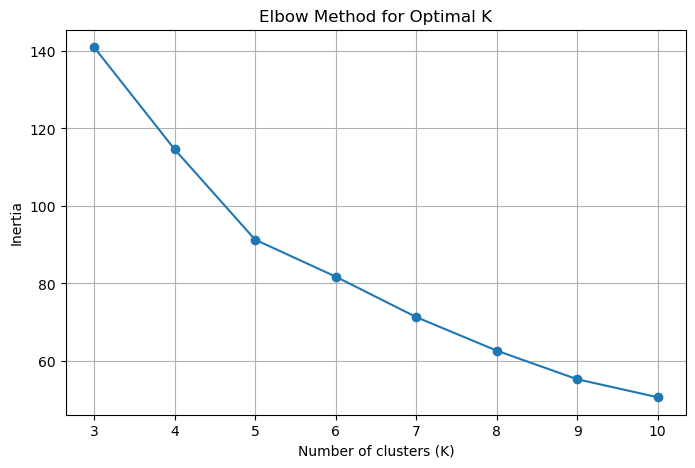

In [184]:
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
k_range = range(3, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [185]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)